# 와인 품질 측정하기

데이터 원작자 UCI

---
# 문제 정의
와인의 화학 데이터를 기반으로 와인의 품질을 측정해보자

# 가설 수립
산성도, 알코올도수와 같은 정량적인 화학데이터를 이용해서 미각측정단계없이 와인의 품질을 측정하는게 가능하다.

# 목표
화학 특징 데이터를 입력받아 0~10사이의 숫자로 와인 품질을 나타낸다

---
# 데이터 구성

## 11개 특징 데이터
1. fixed acidity
2. volatile acidity
...
데이터 설명 페이지에서 확인할 것

## 요약
개수 1599개 출력데이터 quailty 와인품질

---
# 분석 단계

## 단계1. 데이터 불러오기
## 단계2. EDA & Feature Engineering
## 단계3. 데이터셋 구성
## 단계4. 모델링과 학습
## 단계5. 모델 검증

# 1. 데이터 불러오기

In [3]:
import pandas as pd

df = pd.read_csv('data/wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4.617195
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,4.782987
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,4.868157
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,5.929590
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,4.714931
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.420490
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,5.730746
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.337004
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,4.697053


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.622542
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.858455
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,2.552934
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,4.982849
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,5.568807
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.189646
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.456527


---
# 2. EDA & feature engineering

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

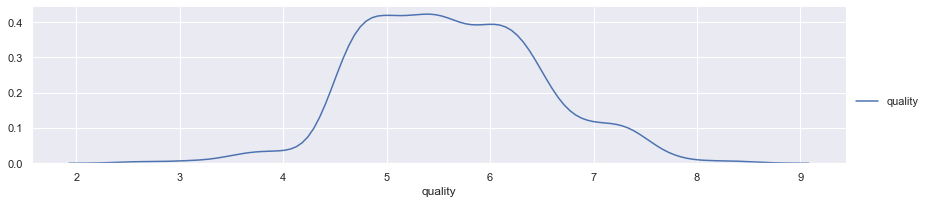

In [8]:
facet = sns.FacetGrid(df, aspect=4)
facet.map(sns.kdeplot, 'quality')
facet.add_legend()
plt.show()

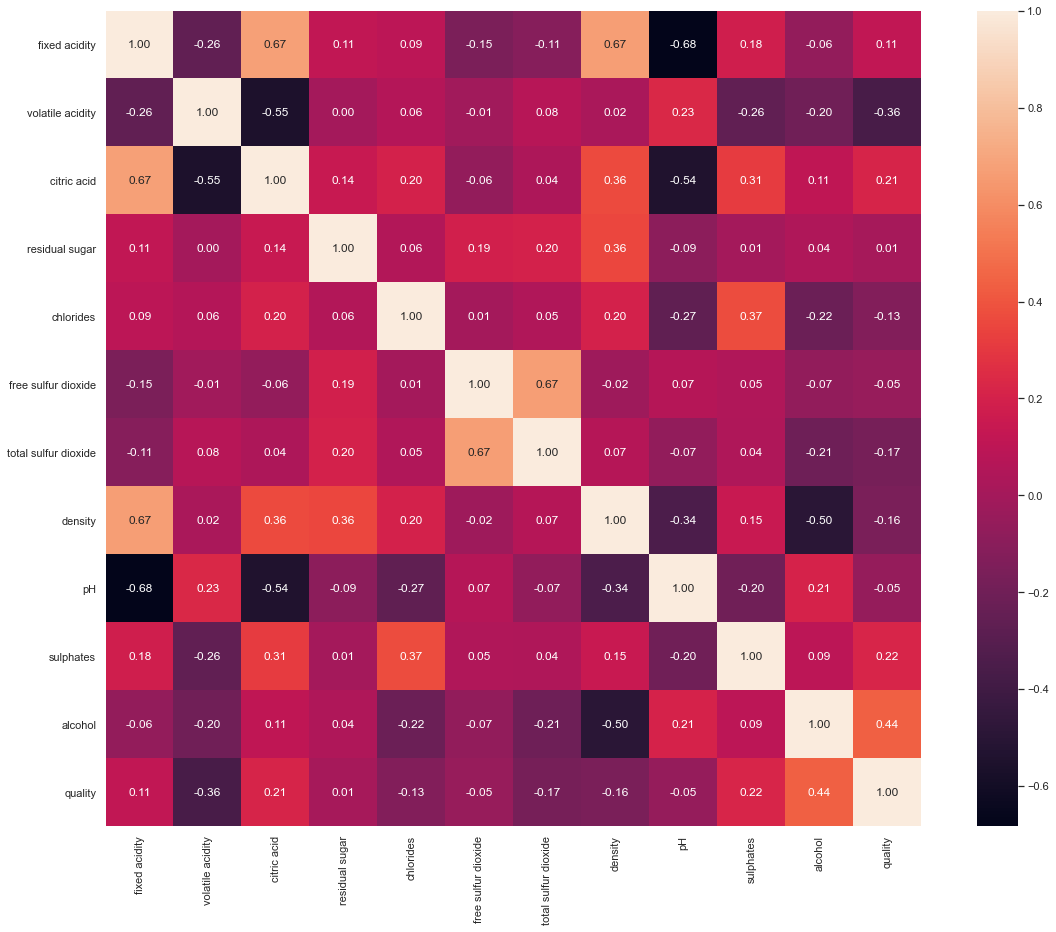

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True)
plt.show()

In [10]:
input_data = df.drop(['quality'], axis=1)
target_data = df['quality']

print(input_data.shape, target_data.shape)

(1599, 11) (1599,)


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1279, 11) (320, 11) (1279,) (320,)


---
# 4. 모델링 & 학습

## Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100)

forest.fit(x_train, y_train)

RandomForestRegressor()

In [15]:
print('training set accuracy:', forest.score(x_train, y_train)) # 회귀문제 -> 상관계수에 기반한 결정계수 값을 점수화

training set accuracy: 0.9054799337203274


## Support Vector Machine

In [17]:
# 회귀문제
from sklearn.svm import SVR
model = SVR() # 초기화
model.fit(x_train, y_train)

SVR()

In [18]:
print('training set accuracy:', model.score(x_train, y_train))

training set accuracy: 0.1701728851578077


---

# 5. 모델 검증

## Random Forest


In [21]:
print('test set accuracy:', forest.score(x_test, y_test))

test set accuracy: 0.4533539669594696


In [22]:
y_predict = forest.predict(x_test)

In [23]:
comparision = pd.DataFrame(y_test)

comparision['내 추측'] = y_predict

comparision

,quality,내 추측
1176,3.940239,5.321576
571,5.523603,5.868919
1537,6.343645,5.496926
969,5.413276,5.512431
1270,5.511097,6.403091
...,...,...
682,5.268495,5.388519
1041,5.882912,5.899870
1483,4.510767,5.695829
1535,5.517416,5.418552


## SVM

In [25]:
print('test set accuracy:', model.score(x_test, y_test))

test set accuracy: 0.18193419569929303


---
# 더 좋은 평가지표 고안하기(카테고리화)

In [26]:
comparision = round(comparision)
comparision.head()

,quality,내 추측
1176,4.0,5.0
571,6.0,6.0
1537,6.0,5.0
969,5.0,6.0
1270,6.0,6.0


In [27]:
evaluation = (comparision['quality'] == comparision['내 추측'])
evaluation

1176    False
571      True
1537    False
969     False
1270     True
        ...  
682      True
1041     True
1483    False
1535    False
719      True
Length: 320, dtype: bool

In [28]:
success = (evaluation == True).sum()
failure = (evaluation == False).sum()

print(success / (success + failure)) # 예측 성공률

0.70625
